In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-bright')

# Exploring Eurostat "Recycling rate of packaging waste"

https://ec.europa.eu/eurostat/web/circular-economy/indicators/main-tables <br>
Waste management -> Recycling rate of packaging waste by type of packaging (cei_wm020)

..\data\recycling_of_packaging_waste\cei_vm020.tsv

W1501 - all packaging<br>
W150101 - paper and cardboard packaging<br>
W150102 - plastic packaging<br>
W150103 - wood packaging<br>
W150104 - metallic packaging<br>
W150107 - glass packaging

The EU target for 2025 is 65% of all packaging waste recycled.

In [2]:
recycling = pd.read_csv('../clean_data/cei_wm020_clean.tsv', sep='\t')
recycling.tail()

,"waste,unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
193,"W150107,RT,RO",NaN,NaN,NaN,NaN,NaN,10.2,7.5,16.6,34.7,...,56.8,60.0,66.3,49.2,54.2,41.1,64.1,63.0,61.1,NaN
194,"W150107,RT,SE",86.1,84.0,87.6,91.6,103.6,95.3,91.4,94.5,93.5,...,92.9,91.9,88.2,89.0,94.7,93.6,92.8,93.0,92.7,93.1
195,"W150107,RT,SI",NaN,NaN,NaN,NaN,17.9,40.6,38.1,41.8,79.8,...,75.1,82.3,87.3,85.9,99.3,98.5,100.2,98.5,104.0,99.5
196,"W150107,RT,SK",NaN,NaN,NaN,26.5,26.5,50.1,14.6,55.0,47.6,...,55.7,63.9,69.4,72.9,67.7,66.2,62.2,68.7,68.6,69.7
197,"W150107,RT,UK",38.6,34.8,34.1,37.5,43.7,52.5,51.4,55.2,61.3,...,60.7,63.9,67.8,68.3,67.2,65.7,66.9,67.6,68.5,NaN


In [3]:
def row_to_series(row_id):
    row = recycling[recycling['waste,unit,geo\\time'] == row_id]
    row = row.drop('waste,unit,geo\\time', axis=1)
    return row.squeeze()

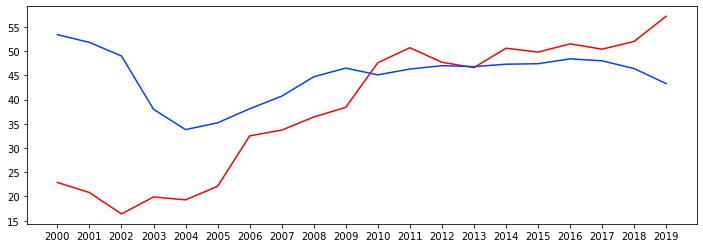

In [4]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(row_to_series('W150102,RT,NL'), color='red') # plastic, The Netherlands
ax.plot(row_to_series('W150102,RT,DE'))

<AxesSubplot:>

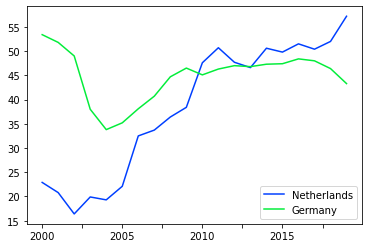

In [5]:
nl_de_plastic = pd.DataFrame({'Netherlands': row_to_series('W150102,RT,NL'),
                             'Germany': row_to_series('W150102,RT,DE')})
nl_de_plastic.plot()

In [6]:
# Which countries in Europe recycle the greatest percentage of plastic (as of 2019)?

recycling_plastic = recycling[recycling['waste,unit,geo\\time'].str.startswith('W150102')]
recycling_plastic = recycling_plastic.drop([76, 77], axis=0)
recycling_plastic['waste,unit,geo\\time'] = recycling_plastic['waste,unit,geo\\time'].str[-2:]
recycling_plastic.head()

,"waste,unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
66,AT,26.2,29.1,30.0,30.7,33.2,32.9,35.8,32.7,34.9,...,34.4,34.8,34.7,34.4,33.6,33.6,33.6,33.4,31.9,30.8
67,BE,25.5,28.5,29.5,32.5,36.5,38.1,38.6,38.4,39.5,...,41.5,41.4,41.5,39.0,41.8,42.6,43.4,44.5,42.4,47.4
68,BG,NaN,NaN,NaN,NaN,NaN,8.4,20.2,19.5,15.6,...,40.9,39.2,40.7,41.3,64.1,60.8,52.6,64.8,59.2,NaN
69,CY,NaN,NaN,NaN,NaN,9.0,8.7,14.5,14.3,14.8,...,27.2,38.0,44.8,45.3,46.6,63.7,62.3,65.0,54.3,50.5
70,CZ,NaN,NaN,NaN,37.6,43.8,35.0,44.3,45.5,50.2,...,54.0,57.0,58.2,59.7,58.2,61.7,59.2,58.9,57.0,61.0


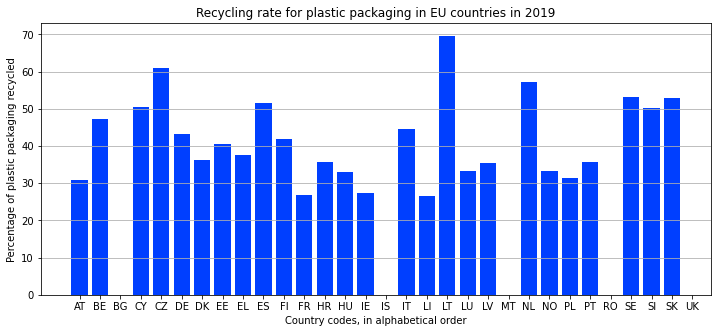

In [7]:
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(x=recycling_plastic['waste,unit,geo\\time'], height=recycling_plastic['2019']);
ax.grid(axis='y')
ax.set(title='Recycling rate for plastic packaging in EU countries in 2019',
      xlabel='Country codes, in alphabetical order',
      ylabel='Percentage of plastic packaging recycled');

In [8]:
# Which types of packaging are more easily recycled than others? / Paper, plastic or glass packaging?

recycling_eu27 = recycling[recycling['waste,unit,geo\\time'].str.endswith('EU27_2020')]
recycling_eu27 = recycling_eu27.drop(10, axis=0)
recycling_eu27 = recycling_eu27.drop(['2000', '2001', '2002', '2003', '2004'], axis=1)
recycling_eu27['waste,unit,geo\\time'] = recycling_eu27['waste,unit,geo\\time'].str[6:7]
recycling_eu27['waste,unit,geo\\time'] = recycling_eu27['waste,unit,geo\\time'].str.replace('1', 'paper/cardboard').str.replace('2', 'plastic').str.replace('3', 'wood').str.replace('4', 'metal').str.replace('7', 'glass')
recycling_eu27

,"waste,unit,geo\time",2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
43,paper/cardboard,73.2,75.4,78.3,81.0,83.3,83.8,82.7,83.5,84.0,84.1,83.9,85.4,85.5,84.2,82.3
76,plastic,24.4,27.1,28.6,30.9,33.5,34.1,35.6,37.0,37.5,39.0,40.5,42.4,41.7,41.4,41.0
109,wood,34.2,34.9,37.8,34.4,33.6,35.3,36.6,37.5,35.2,39.3,41.4,40.7,41.2,35.6,31.1
142,metal,63.7,68.1,69.5,69.7,72.6,74.6,75.7,76.6,77.8,78.5,79.3,80.2,80.7,82.9,78.0
175,glass,60.0,62.2,65.1,66.9,68.8,71.2,72.3,73.1,73.4,75.3,74.2,75.3,75.9,75.8,76.3


[Text(0.5, 1.0, 'Recycling rate of different types of packaging in EU27 in 2019'),
 Text(0.5, 0, 'Percentage of packaging recycled'),
 Text(0, 0.5, 'Type of packaging')]

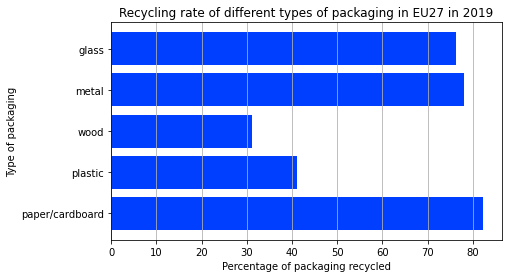

In [9]:
fig, ax = plt.subplots(figsize=(7,4))

ax.barh(recycling_eu27['waste,unit,geo\\time'], recycling_eu27['2019']);
ax.grid(axis='x')
ax.set(title='Recycling rate of different types of packaging in EU27 in 2019',
      xlabel='Percentage of packaging recycled',
      ylabel='Type of packaging')

In [10]:
# Is there any progress in recycling rates in NL?

recycling_nl = recycling[recycling['waste,unit,geo\\time'].str.endswith('NL')]
recycling_nl['waste,unit,geo\\time'] = recycling_nl['waste,unit,geo\\time'].str[6:7]
recycling_nl['waste,unit,geo\\time'] = recycling_nl['waste,unit,geo\\time'].str.replace('R', 'all packaging').str.replace('1', 'paper/cardboard').str.replace('2', 'plastic').str.replace('3', 'wood').str.replace('4', 'metal').str.replace('7', 'glass')
recycling_nl = recycling_nl.rename(columns={'waste,unit,geo\\time': 'Recycling rate'})
recycling_nl = recycling_nl.set_index('Recycling rate')
recycling_nl = recycling_nl.T
recycling_nl

C:\Users\jeyan\AppData\Local\Temp/ipykernel_15364/910433924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recycling_nl['waste,unit,geo\\time'] = recycling_nl['waste,unit,geo\\time'].str[6:7]
C:\Users\jeyan\AppData\Local\Temp/ipykernel_15364/910433924.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recycling_nl['waste,unit,geo\\time'] = recycling_nl['waste,unit,geo\\time'].str.replace('R', 'all packaging').str.replace('1', 'paper/cardboard').str.replace('2', 'plastic').str.replace('3', 'wood').str.

Recycling rate,all packaging,paper/cardboard,plastic,wood,metal,glass
2000,58.8,70.9,22.9,24.8,78.2,80.2
2001,56.0,65.2,20.8,27.1,77.7,78.1
2002,57.4,69.0,16.4,29.4,79.7,78.7
2003,56.4,68.5,19.9,31.9,84.9,76.2
2004,58.5,70.3,19.3,33.4,85.9,75.8
2005,59.4,71.7,22.1,38.6,83.9,77.6
2006,70.2,94.0,32.5,39.1,81.3,83.6
2007,69.8,93.8,33.7,31.7,83.3,85.7
2008,72.4,96.4,36.4,36.1,86.3,87.0
2009,74.9,94.8,38.4,37.6,86.6,91.8


<AxesSubplot:>

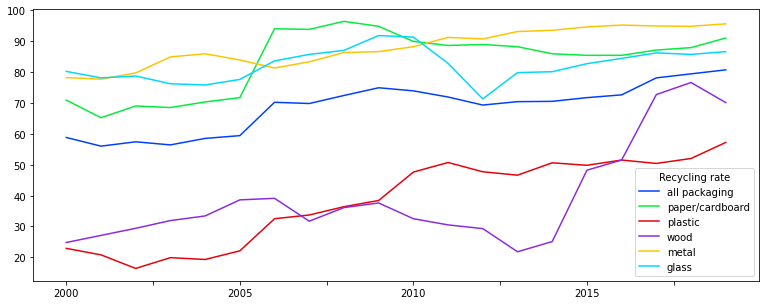

In [11]:
recycling_nl.plot(figsize=(13,5))

In [12]:
recycling_nl = recycling[recycling['waste,unit,geo\\time'].str.endswith('NL')]
recycling_nl

,"waste,unit,geo\time",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
24,"W1501,RT,NL",58.8,56.0,57.4,56.4,58.5,59.4,70.2,69.8,72.4,...,73.9,71.9,69.3,70.4,70.5,71.7,72.6,78.1,79.4,80.7
57,"W150101,RT,NL",70.9,65.2,69.0,68.5,70.3,71.7,94.0,93.8,96.4,...,89.9,88.6,88.9,88.2,85.9,85.4,85.4,87.1,87.9,91.0
90,"W150102,RT,NL",22.9,20.8,16.4,19.9,19.3,22.1,32.5,33.7,36.4,...,47.6,50.7,47.7,46.6,50.6,49.8,51.5,50.4,52.0,57.2
123,"W150103,RT,NL",24.8,27.1,29.4,31.9,33.4,38.6,39.1,31.7,36.1,...,32.5,30.5,29.3,21.8,25.1,48.2,51.5,72.7,76.6,70.1
156,"W150104,RT,NL",78.2,77.7,79.7,84.9,85.9,83.9,81.3,83.3,86.3,...,88.2,91.2,90.7,93.1,93.5,94.6,95.2,94.9,94.8,95.6
189,"W150107,RT,NL",80.2,78.1,78.7,76.2,75.8,77.6,83.6,85.7,87.0,...,91.3,82.8,71.3,79.8,80.1,82.7,84.4,86.2,85.7,86.6
